# Modul 5 Persamaan Diferensial Numerik: Sistem PDB orde 1 dan PDB orde tinggi

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

## Sistem Persamaan Diferensial: *(fourth-order) Runge-Kutta for Systems*

### Bentuk umum

Bentuk umum sistem Persamaan Diferensial:

$u'_1 = f_1(t,u_1,u_2,...,u_m)$

$u'_2 = f_2(t,u_1,u_2,...,u_m)$

$...$

$u'_m = f_m(t,u_1,u_2,...,u_m)$

dengan:

$a \leq t \leq b$

$u_1(a)=a_1, u_2(a)=a_2, ..., u_m(a)=a_m$ (initial value)

Bentuk umum algoritma metode untuk sistem PDB orde 1

```
for i = 1 : N do
    for R in (rumus-rumus untuk iterasi ke-i) do
        for j = 1 : m do
            Hitung R dengan f_j
        endfor
    endfor
endfor
```

Misalnya, apabila ada lima rumus (seperti dalam metode Runge-Kutta orde 4), algoritma untuk sistem menjadi:

```
for i = 1 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor
endfor
```

Apabila misalnya rumus pada iterasi 1, 2, 3 berbeda dengan rumus pada iterasi 4+ (seperti untuk metode Adams predictor-corrector orde 4), algoritma untuk sistem bisa seperti berikut:

```
for i = 1 : 3 do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus3 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus4 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus5 dengan f_j
    endfor 
endfor

for i = 4 : N do
    for j = 1 : m do
        Hitung Rumus1 dengan f_j
    endfor

    for j = 1 : m do
        Hitung Rumus2 dengan f_j
    endfor
endfor
```

### Function file: (fourth-order) Runge-Kutta for systems

Pada modul ini, akan dibahas mengenai metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial. Berikut merupakan code dari metode Runge-Kutta untuk sistem persamaan diferensial pada Octave yang perlu disimpan pada function file.

Untuk dua PDB:

In [ ]:
function [t, w1, w2] = rko4_sys2(f1, f2, a, b, N, alph1, alph2)
  h = (b - a)/N;
  t = w1 = w2 = [];
  t(1) = a;
  w1(1) = alph1;
  w2(1) = alph2;
  for i = 1:N
    k11 = h * f1(t(i), w1(i), w2(i));
    k12 = h * f2(t(i), w1(i), w2(i));

    k21 = h * f1((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));
    k22 = h * f2((t(i)+(h/2)), (w1(i)+(k11/2)), (w2(i)+(k12/2)));

    k31 = h * f1((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));
    k32 = h * f2((t(i)+(h/2)), (w1(i)+(k21/2)), (w2(i)+(k22/2)));

    k41 = h * f1((t(i)+h), (w1(i)+k31), (w2(i)+k32));
    k42 = h * f2((t(i)+h), (w1(i)+k31), (w2(i)+k32));

    w1(i+1) = w1(i) + (k11 + 2*k21 + 2*k31 + k41)/6;
    w2(i+1) = w2(i) + (k12 + 2*k22 + 2*k32 + k42)/6;
    t(i+1) = a + i*h;
  endfor
endfunction

Untuk m PDB:

In [3]:
function [t, w] = rko4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);

  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;

  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : N
    t(i + 1) = t(i) + h;

    for j = 1 : m
      k1(j) = h * cell_f{j}(t(i), w(:, i));
    endfor

    for j = 1 : m
      k2(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k1 / 2));
    endfor

    for j = 1 : m
      k3(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k2 / 2));
    endfor

    for j = 1 : m
      k4(j) = h * cell_f{j}(t(i + 1), w(:, i) + k3);
    endfor

    for j = 1 : m
      w(j, i + 1) = w(j, i) + (k1(j) + 2 * k2(j) + 2 * k3(j) + k4(j)) / 6;
    endfor
  endfor
endfunction

### Contoh sistem PD

$u'_1 = -4u_1+3u_2+6, \;u_1(0)=0$

$u'_2 = -2.4u_1+1.6u_2+3.6, \;u_2(0)=0$

Akan diuji dengan $h=0.1$ dan $0\leq t \leq 0.5$

Solusi eksak:

$u_1(t)=-3.375e^{-2t}+1.875e^{-0.4t}+1.5$

$u_2(t) = -2.25e^{-2t}+2.25e^{-0.4t}$

Berikut adalah code script file untuk menjalankan function metode Runge-Kutta untuk sistem PD di atas (menggunakan yang khusus dua persamaan):

In [ ]:
f1 = @(t, y1, y2) (-4*y1 + 3*y2 + 6);
f2 = @(t, y1, y2) (-2.4*y1 + 1.6*y2 + 3.6);

a = 0;
b = 0.5;
N = 5;
alph1 = 0;
alph2 = 0;

[t, w1, w2] = rko4_sys2(f1, f2, a, b, N, alph1, alph2);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

w1ex = w2ex = [];
for i = 1:length(t)
  w1ex(i) = sln1(t(i));
  w2ex(i) = sln2(t(i));
endfor

[t', w1', w2', w1ex', w2ex']

hold on;
fplot(sln1, [a, b], 'r');
fplot(sln2, [a, b], 'b');
scatter(t, w1, 'r');
scatter(t, w2, 'b');
legend('u1', 'u2');
legend('location', 'northwest');

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

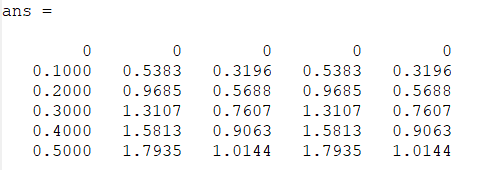

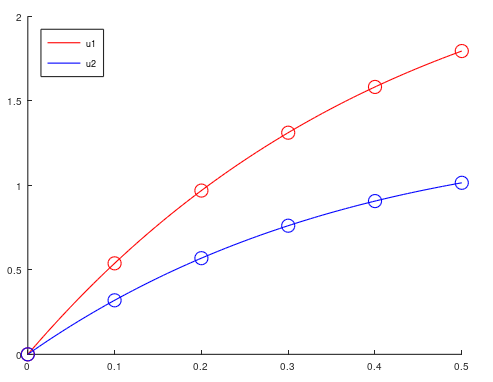

Berikut conoth script file menggunakan kode yang untuk m persamaan.

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



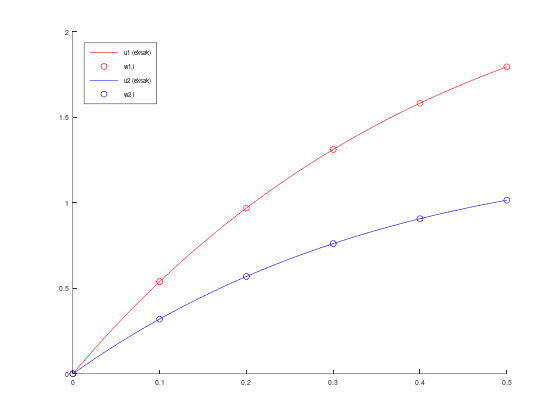

In [4]:
f1 = @(t, u) (-4*u(1) + 3*u(2) + 6);
f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

hold on;
fplot(sln1, [a, b], 'r');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
fplot(sln2, [a, b], 'b');
scatter(t, w(2, :), 'b'); % ambil baris kedua yaitu solusi u2
legend('u1 (eksak)', 'w1,i', 'u2 (eksak)', 'w2,i');
legend('location', 'northwest');

Sebenarnya, kita bisa saja menampilkan dua plot yang terpisah, menggunakan perintah `figure`

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



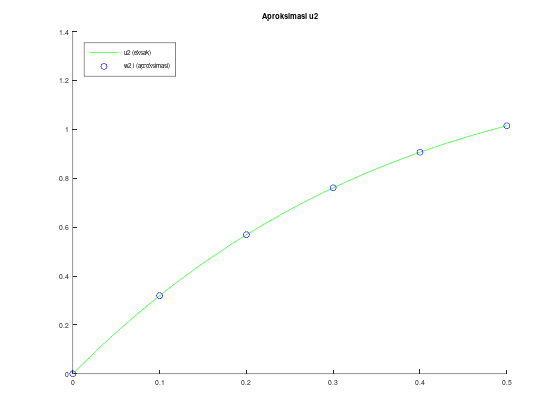

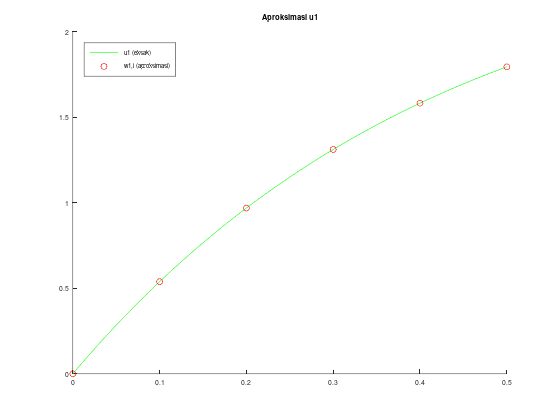

In [5]:
f1 = @(t, u) (-4*u(1) + 3*u(2) + 6);
f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);

a = 0;
b = 0.5;
N = 5;
alpha1 = 0;
alpha2 = 0;

[t, w] = rko4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a, b], 'g');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
title("Aproksimasi u1");
legend("u1 (eksak)", "w1,i (aproksimasi)")
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [a, b], 'g');
scatter(t, w(2, :), 'b'); % ambil baris kedua yaitu solusi u2
title("Aproksimasi u2");
legend("u2 (eksak)", "w2,i (aproksimasi)")
legend('location', 'northwest');

## Contoh lain: untuk metode Taylor orde $n$

In [1]:
function [t, w] = taylor_sysm(cell_f, cell_fp, a, b, N, alphas)
  m = length(cell_f);
  
  h = (b - a) / N;
  n = length(cell_fp{1}) + 1;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;
  for i = 1 : N
    t(i + 1) = t(i) + h;
    
    for j = 1 : m
      T = cell_f{j}(t(i), w(:, i));
      for p = 2 : n
        T += h^(p-1) * cell_fp{j}{p-1}(t(i), w(:, i)) / factorial(p);
      endfor
      w(j, i + 1) = w(j, i) + h * T;
    endfor
  endfor
endfunction

Mencoba masalah yang sama,

$u'_1 = -4u_1+3u_2+6, \;u_1(0)=0$

$u'_2 = -2.4u_1+1.6u_2+3.6, \;u_2(0)=0$

Akan diuji dengan $h=0.1$ dan $0\leq t \leq 0.5$

Solusi eksak:

$u_1(t)=-3.375e^{-2t}+1.875e^{-0.4t}+1.5$

$u_2(t) = -2.25e^{-2t}+2.25e^{-0.4t}$

Perhatikan bahwa

$$u_1' = f_1(t, u_1, u_2) = -4u_1+3u_2+6$$

$$u_2' = f_2(t, u_1, u_2) = -2.4u_1+1.6u_2+3.6$$

### Contoh $n=1$ (metode Euler)

Apabila kita tidak menyediakan turunan (terhadap $t$) dari $f_1$ maupun dari $f_2$, maka $n=1$, yaitu metode Taylor orde $n$ menjadi metode Euler.

ans =

        0        0        0        0        0
   0.1000   0.6000   0.3600   0.5383   0.3196
   0.2000   1.0680   0.6336   0.9685   0.5688
   0.3000   1.4309   0.8387   1.3107   0.7607
   0.4000   1.7101   0.9894   1.5813   0.9063
   0.5000   1.9229   1.0973   1.7935   1.0144



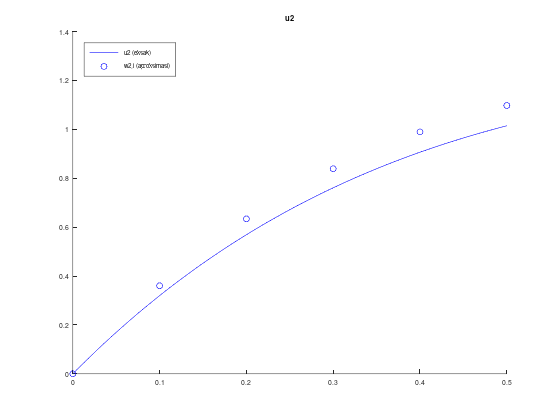

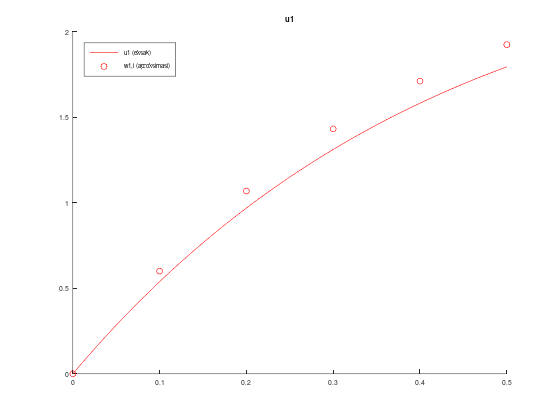

In [11]:
f1 = @(t, u) (-4*u(1) +3*u(2) + 6);
turunan_f1 = {}; % tidak menyediakan turunan f1 terhadap t

f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);
turunan_f2 = {}; % tidak menyediakan turunan f2 terhadap t

a = 0;
b = 0.5;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 0;

[t, w] = taylor_sysm({f1, f2}, {turunan_f1, turunan_f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a,b], 'r');
scatter(t, w(1, :), 'r');
title("u1");
legend("u1 (eksak)", "w1,i (aproksimasi)")
legend('location', 'northwest')

figure;
hold on;
fplot(sln2, [a,b], 'b');
scatter(t, w(2, :), 'b');
title("u2");
legend("u2 (eksak)", "w2,i (aproksimasi)")
legend('location', 'northwest')

### Contoh $n=4$ (metode Taylor orde 4)

Dengan contoh yang sama,

$$u_1' = f_1(t, u_1, u_2) = -4u_1+3u_2+6$$

$$u_2' = f_2(t, u_1, u_2) = -2.4u_1+1.6u_2+3.6$$

Apabila ingin menggunakan metode Taylor orde 4, kita perlu memiliki turunan (terhadap $t$) dari $f_1$ maupun dari $f_2$ hingga turunan ketiga ($n-1=4-1=3$).

Untuk $f_1$,

$$\begin{align*}
    f_1(t, u_1, u_2) &= -4u_1 + 3u_2 + 6 \\[1em]

    f_1'(t, u_1, u_2) &= \frac{d}{dt} f_1(t, u_1, u_2) \\
    &= \frac{d}{dt} \left(-4u_1 + 3u_2 + 6\right) \\
    &= -4u'_1 + 3u'_2 \\
    &= -4\left(-4u_1 + 3u_2 + 6\right)
    + 3\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= 16u_1 - 12u_2 - 24 - 7.2u_1 + 4.8u_2 + 10.8 \\
    &= 8.8u_1 - 7.2u_2 - 13.2 \\[1em]

    f_1''(t, u_1, u_2) &= \frac{d}{dt} f_1'(t, u_1, u_2) \\
    &= \frac{d}{dt} \left(8.8u_1 - 7.2u_2 - 13.2\right) \\
    &= 8.8u_1' - 7.2u_2' \\
    &= 8.8\left(-4u_1 + 3u_2 + 6\right)
    - 7.2\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= -35.2u_1 + 26.4u_2 + 52.8 + 17.28u_1 - 11.52u_2 - 25.92 \\
    &= -17.92u_1 + 14.88u_2 + 26.8 \\[1em]

    f_1'''(t, u_1, u_2) &= \frac{d}{dt} f_1''(t, u_1, u_2) \\
    &= \frac{d}{dt} \left(-17.92u_1 + 14.88u_2 + 26.8\right) \\
    &= -17.92u_1' + 14.88u_2' \\
    &= -17.92\left(-4u_1 + 3u_2 + 6\right)
    + 14.88\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= 71.68u_1 - 53.76u_2 -107.52 - 35.712u_1 + 23.808u_2 + 53.568 \\
    &= 35.968u_1 - 29.952u_2 - 53.952
\end{align*}$$

Untuk $f_2$,

$$\begin{align*}
    f_2(t, u_1, u_2) &= -2.4u_1 + 1.6u_2 + 3.6 \\[1em]

    f_2'(t, u_1, u_2) &= \frac{d}{dt} f_2(t, u_1, u_2) \\
    &= \frac{d}{dt} \left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= -2.4u_1' + 1.6u_2' \\
    &= -2.4\left(-4u_1 + 3u_2 + 6\right)
    + 1.6\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= 9.6u_1 - 7.2u_2 - 14.4 + -3.84u_1 + 2.56u_2 + 5.76 \\
    &= 5.76u_1 - 4.64u_2 - 8.64 \\[1em]

    f_2''(t, u_1, u_2) &= \frac{d}{dt} f_2'(t, u_1, u_2) \\
    &= \frac{d}{dt} \left(5.76u_1 - 4.64u_2 - 8.64\right) \\
    &= 5.76u_1' - 4.64u_2' \\
    &= 5.76\left(-4u_1 + 3u_2 + 6\right)
    -4.64\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= -23.04u_1 + 17.28u_2 + 34.56 + 11.136u_1 - 7.424u_2 - 16.704 \\
    &= -11.904u_1 + 9.856u_2 + 17.856 \\[1em]

    f_2'''(t, u_1, u_2) &= \frac{d}{dt} f_2''(t, u_!, u_2) \\
    &= \frac{d}{dt} \left(-11.904u_1 + 9.856u_2 + 17.856\right) \\
    &= -11.904u_1' + 9.856u_2' \\
    &= -11.904\left(-4u_1 + 3u_2 + 6\right)
    + 9.856\left(-2.4u_1 + 1.6u_2 + 3.6\right) \\
    &= 47.616u_1 - 35.712u_2 - 71.424 - 23.6544u_1 + 15.7696u_2 + 35.4816 \\
    &= 23.9616u_1 - 19.9424u_2 - 35.9424
\end{align*}$$

Sehingga, untuk $f_1$,

$$\begin{align*}
    f_1(t, u_1, u_2) &= -4u_1 + 3u_2 + 6 \\[1em]

    f_1'(t, u_1, u_2) &= 8.8u_1 - 7.2u_2 - 13.2 \\[1em]

    f_1''(t, u_1, u_2) &= -17.92u_1 + 14.88u_2 + 26.8 \\[1em]

    f_1'''(t, u_1, u_2) &= 35.968u_1 - 29.952u_2 - 53.952
\end{align*}$$

dan untuk $f_2$,

$$\begin{align*}
    f_2(t, u_1, u_2) &= -2.4u_1 + 1.6u_2 + 3.6 \\[1em]

    f_2'(t, u_1, u_2) &= 5.76u_1 - 4.64u_2 - 8.64 \\[1em]

    f_2''(t, u_1, u_2) &= -11.904u_1 + 9.856u_2 + 17.856 \\[1em]

    f_2'''(t, u_1, u_2) &= 23.9616u_1 - 19.9424u_2 - 35.9424
\end{align*}$$

Fungsi $f_1$ dan $f_2$ serta turunan-turunannya bisa kita gunakan sebagai berikut.

ans =

        0        0        0        0        0
   0.1000   0.5382   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5812   0.9063   1.5813   0.9063
   0.5000   1.7935   1.0144   1.7935   1.0144



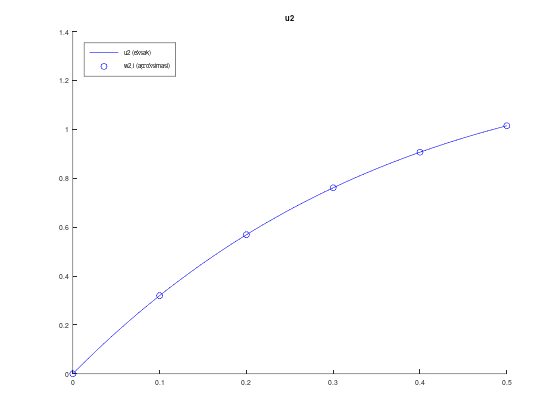

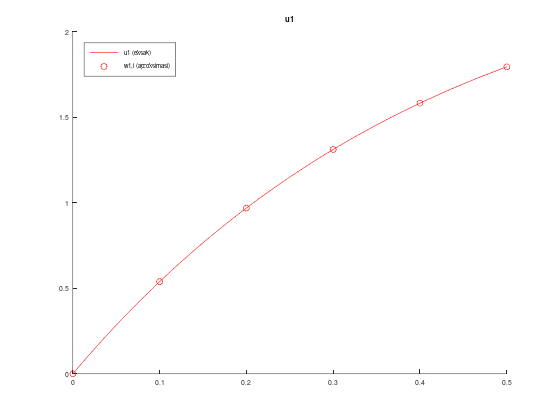

In [2]:
f1    = @(t, u) (-4*u(1) +3*u(2) + 6);
f1p   = @(t, u) (8.8*u(1) - 7.2*u(2) - 13.2);
f1pp  = @(t, u) (-17.92*u(1) + 14.88*u(2) + 26.8);
f1ppp = @(t, u) (35.968*u(1) - 29.952*u(2) - 53.952);
turunan_f1 = {f1p, f1pp, f1ppp};

f2    = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);
f2p   = @(t, u) (5.76*u(1) - 4.64*u(2) - 8.64);
f2pp  = @(t, u) (-11.904*u(1) + 9.856*u(2) + 17.856);
f2ppp = @(t, u) (23.9616*u(1) - 19.9424*u(2) - 35.9424);
turunan_f2 = {f2p, f2pp, f2ppp};

a = 0;
b = 0.5;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 0;

[t, w] = taylor_sysm({f1, f2}, {turunan_f1, turunan_f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a,b], 'r');
scatter(t, w(1, :), 'r');
title("u1");
legend("u1 (eksak)", "w1,i (aproksimasi)")
legend('location', 'northwest')

figure;
hold on;
fplot(sln2, [a,b], 'b');
scatter(t, w(2, :), 'b');
title("u2");
legend("u2 (eksak)", "w2,i (aproksimasi)")
legend('location', 'northwest')

## Contoh lain: untuk metode Adams *predictor-corrector* orde 4

In [12]:
function [t, w] = adams_pc_orde4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);
  
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;
  
  % Hitung w(2), w(3), w(4) menggunakan metode Runge-Kutta orde 4
  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : 3
      t(i + 1) = t(i) + h;
      
      for j = 1 : m
        k1(j) = h * cell_f{j}(t(i), w(:,i));
      endfor
      
      for j = 1 : m
        k2(j) = h * cell_f{j}(t(i) + (h/2), w(:,i) + (k1/2));
      endfor
      
      for j = 1 : m
        k3(j) = h * cell_f{j}(t(i) + (h/2), w(:,i) + (k2/2));
      endfor
      
      for j = 1 : m
        k4(j) = h * cell_f{j}(t(i + 1), w(:,i) + k3);
      endfor
      
      for j = 1 : m
        w(j,i+1) = w(j,i) + (k1(j) + 2*k2(j) + 2*k3(j) + k4(j)) / 6;
      endfor
  endfor
  
  % Algoritma utama Adams Predictor-Corrector orde 4
  m0 = zeros(m, 1);
  m1 = zeros(m, 1);
  m2 = zeros(m, 1);
  m3 = zeros(m, 1);
  m4 = zeros(m, 1);
  for i = 4 : N
    t(i + 1) = t(i) + h;
    
    for j = 1 : m
      m1(j) = cell_f{j}(t(i), w(:,i));
    endfor
    
    for j = 1 : m
      m2(j) = cell_f{j}(t(i-1), w(:,i-1));
    endfor 
    
    for j = 1 : m
      m3(j) = cell_f{j}(t(i-2), w(:,i-2));
    endfor
    
    for j = 1 : m
      m4(j) = cell_f{j}(t(i-3), w(:,i-3));
    endfor
    
    % Adams-Bashforth orde 4 (four-step)
    for j = 1 : m
      w(j,i+1) = w(j,i) + (h/24) * (55*m1(j) - 59*m2(j) + 37*m3(j) - 9*m4(j));
    endfor
    % Adams-Moulton orde 4 (three-step)
    for j = 1 : m
      m0(j) = cell_f{j}(t(i+1), w(:,i+1));
    endfor
    for j = 1 : m
      w(j,i+1) = w(j,i) + (h/24) * (9*m0(j) + 19*m1(j) - 5*m2(j) + m3(j));
    endfor
  endfor
endfunction

Mencoba untuk masalah yang sama, yaitu

$u'_1 = -4u_1+3u_2+6, \;u_1(0)=0$

$u'_2 = -2.4u_1+1.6u_2+3.6, \;u_2(0)=0$

Akan diuji dengan $h=0.1$ dan $0\leq t \leq 0.5$

Solusi eksak:

$u_1(t)=-3.375e^{-2t}+1.875e^{-0.4t}+1.5$

$u_2(t) = -2.25e^{-2t}+2.25e^{-0.4t}$

ans =

        0        0        0        0        0
   0.1000   0.5383   0.3196   0.5383   0.3196
   0.2000   0.9685   0.5688   0.9685   0.5688
   0.3000   1.3107   0.7607   1.3107   0.7607
   0.4000   1.5813   0.9063   1.5813   0.9063
   0.5000   1.7936   1.0144   1.7935   1.0144



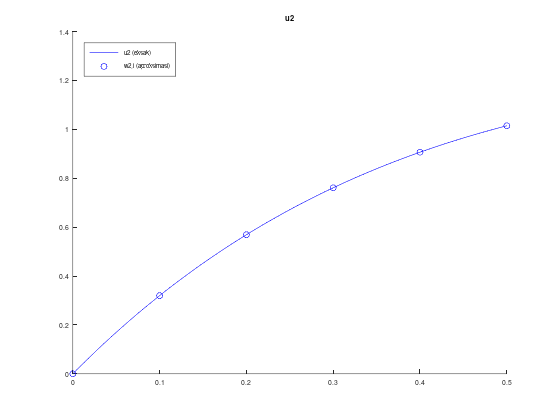

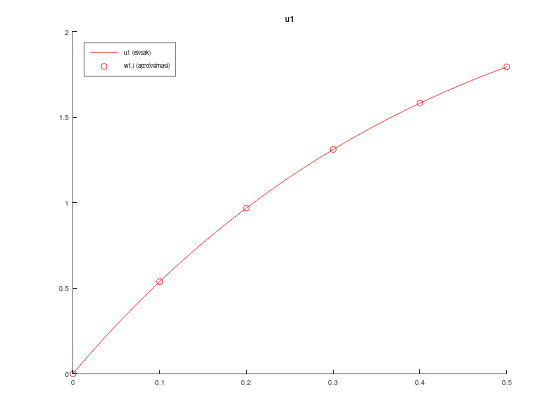

In [15]:
f1 = @(t, u) (-4*u(1) +3*u(2) + 6);
f2 = @(t, u) (-2.4*u(1) + 1.6*u(2) + 3.6);

a = 0;
b = 0.5;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 0;

[t, w] = adams_pc_orde4_sysm({f1, f2}, a, b, N, [alpha1, alpha2]);

sln1 = @(t) (-3.375*exp(-2*t) + 1.875*exp(-0.4*t) + 1.5);
sln2 = @(t) (-2.25*exp(-2*t) + 2.25*exp(-0.4*t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);

[t, w', u1_eksak, u2_eksak]

figure;
hold on;
fplot(sln1, [a,b], 'r');
scatter(t, w(1, :), 'r');
title("u1");
legend("u1 (eksak)", "w1,i (aproksimasi)")
legend('location', 'northwest')

figure;
hold on;
fplot(sln2, [a,b], 'b');
scatter(t, w(2, :), 'b');
title("u2");
legend("u2 (eksak)", "w2,i (aproksimasi)")
legend('location', 'northwest')

## PDB orde tinggi

### (penjelasan tanpa kode) Mengubah PDB orde tinggi menjadi sistem PDB orde 1

Misalkan ada PDB orde $m$ (tidak harus linier),

$$\dots y^{\left(m\right)}\left(t\right) + \dots y^{\left(m-1\right)}\left(t\right) + \dots + \dots y''\left(t\right) + \dots y'\left(t\right) + \dots y\left(t\right) + \dots = 0$$

yang bisa dipindah ruas dsb, untuk memperoleh bentuk:

$$y^{\left(m\right)}\left(t\right) = \left[\text{sisanya}\right]$$

atau biasa ditulis

$$y^{\left(m\right)}\left(t\right) = f\left(t, y, y', y'', \dots, y^{\left(m-1\right)}\right)$$

Kita bisa mendefinisikan fungsi $u_1 \left(t\right), u_2 \left(t\right), \dots, u_m \left(t\right)$ sebagai berikut,

$$\begin{align*}
    u_1 \left(t\right) &= y\left(t\right) \\
    u_2 \left(t\right) &= y'\left(t\right) \\
    &\vdots \\
    u_j \left(t\right) &= y^{\left(j-1\right)}\left(t\right) \\
    &\vdots \\
    u_{m-1} \left(t\right) &= y^{\left(m-2\right)}\left(t\right) \\
    u_m \left(t\right) &= y^{\left(m-1\right)}\left(t\right)
\end{align*}$$

Sehingga turunannya terhadap $t$ adalah,

$$\begin{align*}
    \frac{du_1}{dt} &= y'\left(t\right) \\
    \frac{du_2}{dt} &= y''\left(t\right) \\
    &\vdots \\
    \frac{du_j}{dt} &= y^{\left(j\right)}\left(t\right) \\
    &\vdots \\
    \frac{du_{m-1}}{dt} &= y^{\left(m-1\right)}\left(t\right) \\
    \frac{du_m}{dt} &= y^{\left(m\right)}\left(t\right)
\end{align*}$$

Ternyata, $u_1'\left(t\right) = y'\left(t\right) = u_2\left(t\right)$, lalu $u_2'\left(t\right) = y''\left(t\right) = u_3\left(t\right)$, dan seterusnya. Untuk yang terakhir, sebelumnya kita sudah menuliskan

$$y^{\left(m\right)}\left(t\right) = f\left(t, y, y', y'', \dots, y^{\left(m-1\right)}\right)$$

sedangkan $\frac{du_m}{dt} = y^{\left(m\right)}\left(t\right)$.

Sehingga, bisa ditulis:

$$\begin{align*}
    \frac{du_1}{dt} &= u_2\left(t\right) \\
    \frac{du_2}{dt} &= u_3\left(t\right) \\
    &\vdots \\
    \frac{du_j}{dt} &= u_{j+1}\left(t\right) \\
    &\vdots \\
    \frac{du_{m-1}}{dt} &= u_m\left(t\right) \\
    \frac{du_m}{dt} &= f\left(t, y, y', y'', \dots, y^{\left(m-1\right)}\right) \\
\end{align*}$$

yaitu sistem PDB orde 1 dalam $u_1 \left(t\right), u_2 \left(t\right), \dots, u_m \left(t\right)$.

Solusi $y\left(t\right)$ bisa diperoleh dari $u_1 \left(t\right)$. Apabila ditanya $y'\left(t\right)$, maka bisa diperoleh dari $u_2 \left(t\right)$. Apabila ditanya $y''\left(t\right)$, maka bisa diperoleh dari $u_3 \left(t\right)$, dan seterusnya.

### Contoh: mengubah PDB orde 3 menjadi sistem PDB

Menggunakan soal Exercise Set 5.9 no. 3d dari buku,

$$t^3 y''' - t^2 y'' + 3ty' - 4y = 5t^3 \ln{t} + 9t^3, \quad 1 \le t \le 2$$

$$y(1) = 0, \quad y'(1) = 1, \quad y''(1) = 3$$

dengan $h=0.1$, dan diketahui solusi eksak

$$y(t) = -t^2 + t\cos{\left(\ln{t}\right)} + t\sin{\left(\ln{t}\right)} + t^3 \ln{t}$$

$$y'(t) = -2t + 2\cos{\left(\ln{t}\right)} + t^2 + 3t^2 \ln{t}$$

$$y''(t) = -2 - \frac{2}{t}\sin{\left(\ln{t}\right)} + 5t + 6t \ln{t}$$

Perhatikan bahwa turunan tertinggi adalah turunan ketiga, sehingga PDB yang diberikan adalah PDB orde 3, yaitu PDB orde $m$ dengan $m=3$.

Kita bisa melakukan pindah ruas agar memperoleh bentuk

$$y''' = \left[\text{sisanya}\right]$$

atau bisa ditulis

$$y''' = f\left(t, y, y', y''\right)$$

seperti berikut:

$$t^3 y''' - t^2 y'' + 3ty' - 4y = 5t^3 \ln{t} + 9t^3$$

$$t^3 y''' = t^2 y'' - 3ty' + 4y + 5t^3 \ln{t} + 9t^3$$

$$y''' = \frac{1}{t^3}\left(t^2 y'' - 3ty' + 4y + 5t^3 \ln{t} + 9t^3\right)$$

$$y''' = \frac{1}{t} y'' - \frac{3}{t^2}y' + \frac{4}{t^3}y + 5 \ln{t} + 9$$

Sehingga bisa ditulis

$$y''' = f\left(t, y, y', y''\right) = \frac{1}{t} y'' - \frac{3}{t^2}y' + \frac{4}{t^3}y + 5 \ln{t} + 9, \quad 1 \le t \le 2$$

$$y(1) = 0, \quad y'(1) = 1, \quad y''(1) = 3$$

PDB orde $m=3$ bisa diubah menjadi sistem PDB orde 1 yang terdiri dari $m=3$ persamaan, dengan permisalan

$$u_1(t) = y(t)$$

$$u_2(t) = y'(t)$$

$$u_3(t) = y''(t)$$

sehingga

$$\begin{align*}
    u_1'(t) &= y'(t) = u_2(t) \\
    u_2'(t) &= y''(t) = u_3(t) \\
    u_3'(t) &= y'''(t) = f\left(t, y, y', y''\right) = \frac{1}{t} y'' - \frac{3}{t^2}y' + \frac{4}{t^3}y + 5 \ln{t} + 9
\end{align*}$$

atau bisa ditulis

$$\begin{align*}
    u_1'(t) &= u_2(t) \\
    u_2'(t) &= u_3(t) \\
    u_3'(t) &= f\left(t, u_1, u_2, u_3\right) = \frac{1}{t} u_3(t) - \frac{3}{t^2}u_2(t) + \frac{4}{t^3}u_1(t) + 5 \ln{t} + 9
\end{align*}$$

Berdasarkan permisalan, nilai-nilai awal

$$y(1) = 0, \quad y'(1) = 1, \quad y''(1) = 3$$

menjadi

$$u_1(1) = 0, \quad u_2(1) = 1, \quad u_3(1) = 3$$

Sehingga, diperoleh sistem PDB orde 3 sebagai berikut:

$$\begin{align*}
    u_1' &= u_2, \quad u_1(1) = 0 \\
    u_2' &= u_3, \quad u_2(1) = 1 \\
    u_3' &= \frac{1}{t} u_3 - \frac{3}{t^2}u_2 + \frac{4}{t^3}u_1 + 5 \ln{t} + 9,
    \quad u_3(1) = 3
\end{align*}$$

Kita dapat memisalkan

$$\begin{align*}
    f_1\left(t, u_1, u_2, u_3\right) &= u_1' \\
    f_2\left(t, u_1, u_2, u_3\right) &= u_2' \\
    f_3\left(t, u_1, u_2, u_3\right) &= u_3'
\end{align*}$$

yaitu

$$\begin{align*}
    f_1\left(t, u_1, u_2, u_3\right) &= u_2 \\
    f_2\left(t, u_1, u_2, u_3\right) &= u_3 \\
    f_3\left(t, u_1, u_2, u_3\right) &= \frac{1}{t} u_3 - \frac{3}{t^2}u_2 + \frac{4}{t^3}u_1 + 5 \ln{t} + 9
\end{align*}$$

agar sistem PDB orde 3 di atas bisa ditulis dalam bentuk umum sistem PDB orde 1, yaitu

$$\begin{align*}
    u_1' &= f_1\left(t, u_1, u_2, u_3\right) \\
    u_2' &= f_2\left(t, u_1, u_2, u_3\right) \\
    u_3' &= f_3\left(t, u_1, u_2, u_3\right)
\end{align*}$$

masih dengan nilai-nilai awal

$$u_1(1) = 0, \quad u_2(1) = 1, \quad u_3(1) = 3$$

Setelah bentuknya diubah menjadi sistem PDB orde 1, kita dapat menyelesaikannya menggunakan algoritma-algoritma sistem PDB orde 1 seperti biasa. Berdasarkan permisalan yang telah dilakukan,

- solusi $u_1(t)$ akan menjadi solusi $y(t)$, biasanya ini yang diminta

- solusi $u_2(t)$ akan menjadi solusi $y'(t)$

- solusi $u_3(t)$ akan menjadi solusi $y''(t)$

Walaupun mungkin kita hanya memerlukan solusi $y(t)$, algoritma yang tersedia mengharuskan semua nilai dihitung di tiap iterasi. Tidak ada salahnya juga; siapa tahu, misalnya solusi $y'(t)$ atau solusi $y''(t)$ diperlukan nantinya.

(Apabila diperlukan, nilai $y^{\left(m\right)}(t)$, yaitu nilai $y'''(t)$, bisa dihitung menggunakan $f\left(t, y, y', y'', \dots, y^{\left(m-1\right)}\right)$, yaitu menggunakan $f\left(t, y, y', y''\right) = \frac{1}{t} y'' - \frac{3}{t^2}y' + \frac{4}{t^3}y + 5 \ln{t} + 9$.)

### Contoh metode Runge-Kutta orde 4

Sistem kita adalah

$$\begin{align*}
    u_1' &= f_1\left(t, u_1, u_2, u_3\right) = u_2 \\
    u_2' &= f_2\left(t, u_1, u_2, u_3\right) = u_3 \\
    u_3' &= f_3\left(t, u_1, u_2, u_3\right) = \frac{1}{t} u_3 - \frac{3}{t^2}u_2 + \frac{4}{t^3}u_1 + 5 \ln{t} + 9
\end{align*}$$

$$1 \le t \le 2$$

$$u_1(1) = 0, \quad u_2(1) = 1, \quad u_3(1) = 3$$

dengan $h=0.1$, dan diketahui solusi eksak

$$y(t) = -t^2 + t\cos{\left(\ln{t}\right)} + t\sin{\left(\ln{t}\right)} + t^3 \ln{t}$$

$$y'(t) = -2t + 2\cos{\left(\ln{t}\right)} + t^2 + 3t^2 \ln{t}$$

$$y''(t) = -2 - \frac{2}{t}\sin{\left(\ln{t}\right)} + 5t + 6t \ln{t}$$

(yang bisa dianggap solusi eksak untuk $u_1$, $u_2$, dan $u_3$, sesuai permisalan)

Kita bisa menggunakan metode Runge-Kutta orde 4 untuk sistem, seperti berikut.

ans =

    1.0000         0    1.0000    3.0000         0    1.0000    3.0000
    1.1000    0.1165    1.3469    3.9560    0.1165    1.3469    3.9560
    1.2000    0.2727    1.7945    5.0105    0.2727    1.7945    5.0105
    1.3000    0.4791    2.3517    6.1474    0.4791    2.3517    6.1474
    1.4000    0.7470    3.0263    7.3547    0.7470    3.0263    7.3547
    1.5000    1.0885    3.8247    8.6232    1.0885    3.8247    8.6233
    1.6000    1.5163    4.7527    9.9459    1.5163    4.7528    9.9459
    1.7000    2.0435    5.8155   11.3170    2.0435    5.8155   11.3170
    1.8000    2.6840    7.0176   12.7319    2.6840    7.0176   12.7320
    1.9000    3.4518    8.3632   14.1869    3.4518    8.3633   14.1869
    2.0000    4.3616    9.8562   15.6788    4.3616    9.8562   15.6788



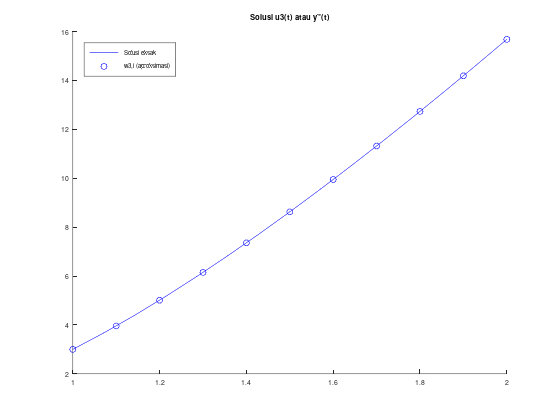

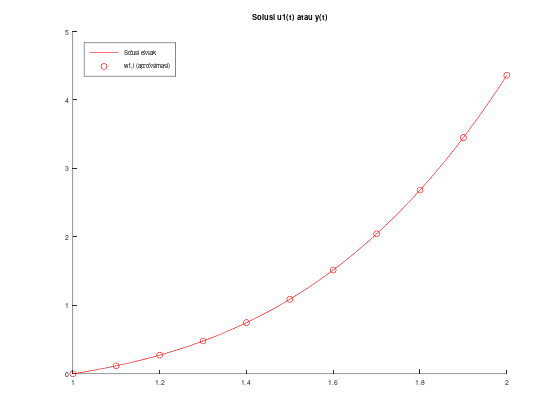

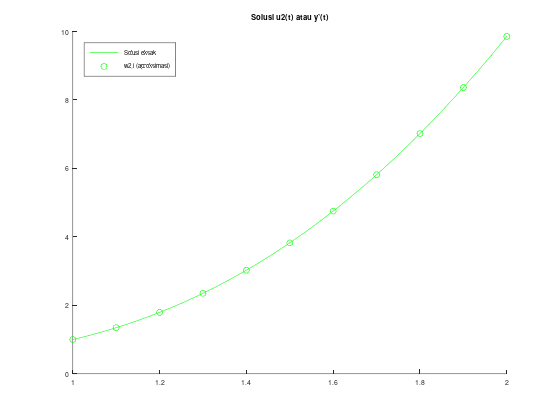

In [10]:
f1 = @(t, u) u(2);
f2 = @(t, u) u(3);
f3 = @(t, u) (1/t .* u(3) - 3/(t.^2) .* u(2) + 4/(t.^3) .* u(1) + 5*log(t) + 9);

a = 1;
b = 2;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 1;
alpha3 = 3;

[t, w] = rko4_sysm({f1, f2, f3}, a, b, N, [alpha1, alpha2, alpha3]);

% solusi eksak
sln1 = @(t) (-t.^2 + t .* cos(log(t)) + t .* sin(log(t)) + t.^3 .* log(t));
sln2 = @(t) (-2*t + 2 * cos(log(t)) + t.^2 + 3 * t.^2 .* log(t));
sln3 = @(t) (-2 - 2./t .* sin(log(t)) + 5*t + 6 * t .* log(t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);
u3_eksak = sln3(t);

[t, w', u1_eksak, u2_eksak, u3_eksak]

figure;
hold on;
fplot(sln1, [a, b], 'r');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
title("Solusi u1(t) atau y(t)");
legend("Solusi eksak", "w1,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [a, b], 'g');
scatter(t, w(2, :), 'g'); % ambil baris kedua yaitu solusi u2
title("Solusi u2(t) atau y'(t)");
legend("Solusi eksak", "w2,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln3, [a, b], 'b');
scatter(t, w(3, :), 'b'); % ambil baris ketiga yaitu solusi u3
title("Solusi u3(t) atau y''(t)");
legend("Solusi eksak", "w3,i (aproksimasi)");
legend('location', 'northwest');

Apabila perlu dihitung errornya, kodenya bisa menjadi seperti berikut:

Perbandingan aproksimasi dengan solusi eksak:
ans =

    1.0000         0    1.0000    3.0000         0    1.0000    3.0000
    1.1000    0.1165    1.3469    3.9560    0.1165    1.3469    3.9560
    1.2000    0.2727    1.7945    5.0105    0.2727    1.7945    5.0105
    1.3000    0.4791    2.3517    6.1474    0.4791    2.3517    6.1474
    1.4000    0.7470    3.0263    7.3547    0.7470    3.0263    7.3547
    1.5000    1.0885    3.8247    8.6232    1.0885    3.8247    8.6233
    1.6000    1.5163    4.7527    9.9459    1.5163    4.7528    9.9459
    1.7000    2.0435    5.8155   11.3170    2.0435    5.8155   11.3170
    1.8000    2.6840    7.0176   12.7319    2.6840    7.0176   12.7320
    1.9000    3.4518    8.3632   14.1869    3.4518    8.3633   14.1869
    2.0000    4.3616    9.8562   15.6788    4.3616    9.8562   15.6788

Hasil aproksimasi u1, solusi eksak, dan error:


ans =

   1.000000000000000                   0                   0                   0
   1.100000000000000   0.116547765077132   0.116547953377741   0.000000188300609
   1.200000000000000   0.272737593417178   0.272737913137213   0.000000319720036
   1.300000000000000   0.479101055922200   0.479101624357037   0.000000568434836
   1.400000000000000   0.746997034090164   0.746998073629463   0.000001039539299
   1.500000000000000   1.088490794798314   1.088492594095847   0.000001799297533
   1.600000000000001   1.516261839314915   1.516264730431065   0.000002891116151
   1.700000000000001   2.043532071845456   2.043536416215900   0.000004344370444
   1.800000000000001   2.684008671952472   2.684014851438298   0.000006179485825
   1.900000000000001   3.451837841224076   3.451846252199066   0.000008410974990
   2.000000000000001   4.361566750517713   4.361577799834785   0.000011049317072

Hasil aproksimasi u2, solusi eksak, dan error:
ans =

   1.000000000000000   1.000000000000000   1.00

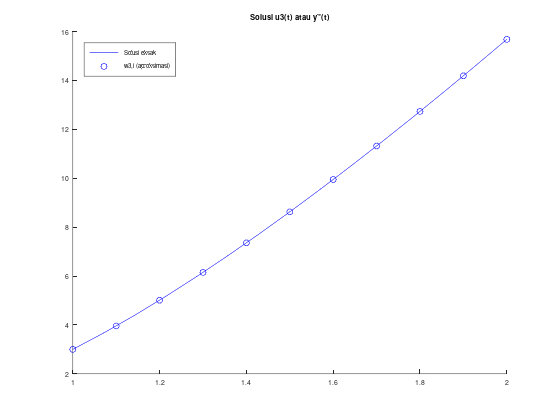

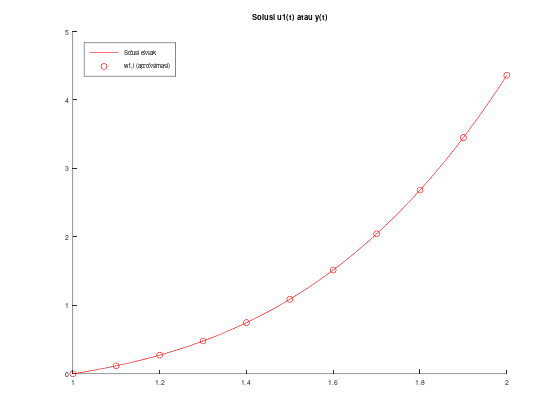

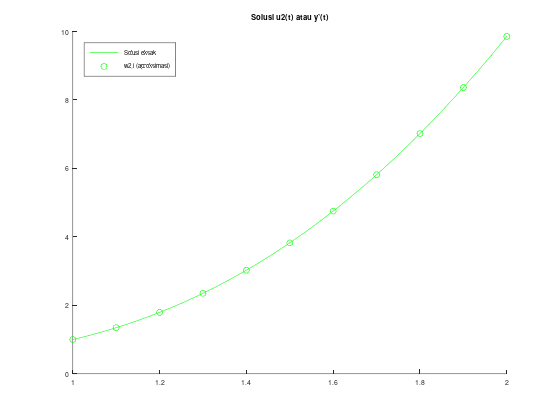

In [16]:
f1 = @(t, u) u(2);
f2 = @(t, u) u(3);
f3 = @(t, u) (1/t .* u(3) - 3/(t.^2) .* u(2) + 4/(t.^3) .* u(1) + 5*log(t) + 9);

a = 1;
b = 2;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 1;
alpha3 = 3;

[t, w] = rko4_sysm({f1, f2, f3}, a, b, N, [alpha1, alpha2, alpha3]);

% solusi eksak
sln1 = @(t) (-t.^2 + t .* cos(log(t)) + t .* sin(log(t)) + t.^3 .* log(t));
sln2 = @(t) (-2*t + 2 * cos(log(t)) + t.^2 + 3 * t.^2 .* log(t));
sln3 = @(t) (-2 - 2./t .* sin(log(t)) + 5*t + 6 * t .* log(t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);
u3_eksak = sln3(t);

u1_error = abs(w(1, :)' - u1_eksak);
u2_error = abs(w(2, :)' - u2_eksak);
u3_error = abs(w(3, :)' - u3_eksak);

disp("Perbandingan aproksimasi dengan solusi eksak:");
[t, w', u1_eksak, u2_eksak, u3_eksak]

format long; % agar lebih banyak digit ditampilkan

disp("Hasil aproksimasi u1, solusi eksak, dan error:");
[t, w(1, :)', u1_eksak, u1_error]

disp("Hasil aproksimasi u2, solusi eksak, dan error:");
[t, w(2, :)', u2_eksak, u2_error]

disp("Hasil aproksimasi u3, solusi eksak, dan error:");
[t, w(3, :)', u3_eksak, u3_error]

format; % kembali ke setting digit semula

figure;
hold on;
fplot(sln1, [a, b], 'r');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
title("Solusi u1(t) atau y(t)");
legend("Solusi eksak", "w1,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [a, b], 'g');
scatter(t, w(2, :), 'g'); % ambil baris kedua yaitu solusi u2
title("Solusi u2(t) atau y'(t)");
legend("Solusi eksak", "w2,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln3, [a, b], 'b');
scatter(t, w(3, :), 'b'); % ambil baris ketiga yaitu solusi u3
title("Solusi u3(t) atau y''(t)");
legend("Solusi eksak", "w3,i (aproksimasi)");
legend('location', 'northwest');

### Contoh metode Adams Predictor-Corrector orde 4

Kita bisa menggunakan kode di atas, tinggal menukar fungsi `rko4_sysm` dengan `adams_pc_orde4_sysm`

ans =

    1.0000         0    1.0000    3.0000         0    1.0000    3.0000
    1.1000    0.1165    1.3469    3.9560    0.1165    1.3469    3.9560
    1.2000    0.2727    1.7945    5.0105    0.2727    1.7945    5.0105
    1.3000    0.4791    2.3517    6.1474    0.4791    2.3517    6.1474
    1.4000    0.7470    3.0263    7.3547    0.7470    3.0263    7.3547
    1.5000    1.0885    3.8248    8.6232    1.0885    3.8247    8.6233
    1.6000    1.5163    4.7528    9.9459    1.5163    4.7528    9.9459
    1.7000    2.0435    5.8156   11.3170    2.0435    5.8155   11.3170
    1.8000    2.6840    7.0177   12.7319    2.6840    7.0176   12.7320
    1.9000    3.4518    8.3633   14.1869    3.4518    8.3633   14.1869
    2.0000    4.3616    9.8563   15.6787    4.3616    9.8562   15.6788



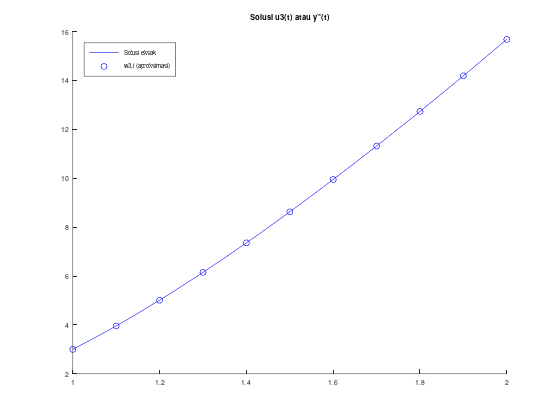

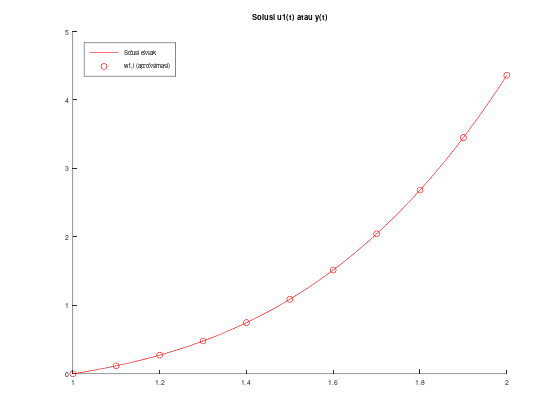

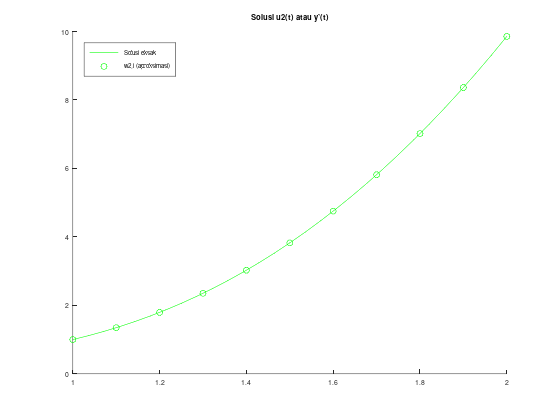

In [13]:
f1 = @(t, u) u(2);
f2 = @(t, u) u(3);
f3 = @(t, u) (1/t .* u(3) - 3/(t.^2) .* u(2) + 4/(t.^3) .* u(1) + 5*log(t) + 9);

a = 1;
b = 2;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 1;
alpha3 = 3;

[t, w] = adams_pc_orde4_sysm({f1, f2, f3}, a, b, N, [alpha1, alpha2, alpha3]);

% solusi eksak
sln1 = @(t) (-t.^2 + t .* cos(log(t)) + t .* sin(log(t)) + t.^3 .* log(t));
sln2 = @(t) (-2*t + 2 * cos(log(t)) + t.^2 + 3 * t.^2 .* log(t));
sln3 = @(t) (-2 - 2./t .* sin(log(t)) + 5*t + 6 * t .* log(t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);
u3_eksak = sln3(t);

[t, w', u1_eksak, u2_eksak, u3_eksak]

figure;
hold on;
fplot(sln1, [a, b], 'r');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
title("Solusi u1(t) atau y(t)");
legend("Solusi eksak", "w1,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [a, b], 'g');
scatter(t, w(2, :), 'g'); % ambil baris kedua yaitu solusi u2
title("Solusi u2(t) atau y'(t)");
legend("Solusi eksak", "w2,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln3, [a, b], 'b');
scatter(t, w(3, :), 'b'); % ambil baris ketiga yaitu solusi u3
title("Solusi u3(t) atau y''(t)");
legend("Solusi eksak", "w3,i (aproksimasi)");
legend('location', 'northwest');

Apabila perlu dihitung errornya:

Perbandingan aproksimasi dengan solusi eksak:
ans =

    1.0000         0    1.0000    3.0000         0    1.0000    3.0000
    1.1000    0.1165    1.3469    3.9560    0.1165    1.3469    3.9560
    1.2000    0.2727    1.7945    5.0105    0.2727    1.7945    5.0105
    1.3000    0.4791    2.3517    6.1474    0.4791    2.3517    6.1474
    1.4000    0.7470    3.0263    7.3547    0.7470    3.0263    7.3547
    1.5000    1.0885    3.8248    8.6232    1.0885    3.8247    8.6233
    1.6000    1.5163    4.7528    9.9459    1.5163    4.7528    9.9459
    1.7000    2.0435    5.8156   11.3170    2.0435    5.8155   11.3170
    1.8000    2.6840    7.0177   12.7319    2.6840    7.0176   12.7320
    1.9000    3.4518    8.3633   14.1869    3.4518    8.3633   14.1869
    2.0000    4.3616    9.8563   15.6787    4.3616    9.8562   15.6788

Hasil aproksimasi u1, solusi eksak, dan error:
ans =

   1.000000000000000                   0                   0                   0
   1.100000000000000   0.11654

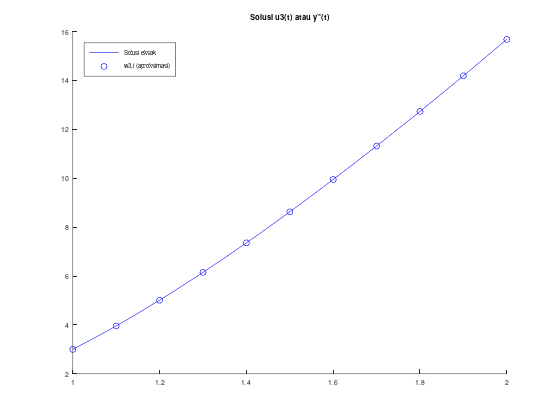

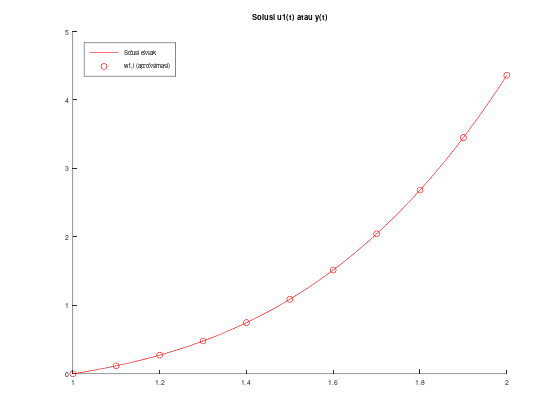

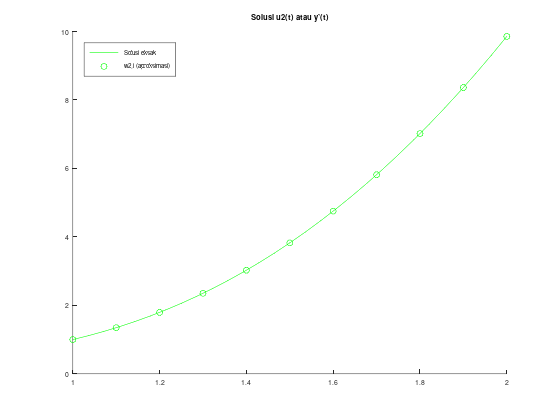

In [17]:
f1 = @(t, u) u(2);
f2 = @(t, u) u(3);
f3 = @(t, u) (1/t .* u(3) - 3/(t.^2) .* u(2) + 4/(t.^3) .* u(1) + 5*log(t) + 9);

a = 1;
b = 2;
h = 0.1;
N = (b - a) / h;
alpha1 = 0;
alpha2 = 1;
alpha3 = 3;

[t, w] = adams_pc_orde4_sysm({f1, f2, f3}, a, b, N, [alpha1, alpha2, alpha3]);

% solusi eksak
sln1 = @(t) (-t.^2 + t .* cos(log(t)) + t .* sin(log(t)) + t.^3 .* log(t));
sln2 = @(t) (-2*t + 2 * cos(log(t)) + t.^2 + 3 * t.^2 .* log(t));
sln3 = @(t) (-2 - 2./t .* sin(log(t)) + 5*t + 6 * t .* log(t));

u1_eksak = sln1(t);
u2_eksak = sln2(t);
u3_eksak = sln3(t);

u1_error = abs(w(1, :)' - u1_eksak);
u2_error = abs(w(2, :)' - u2_eksak);
u3_error = abs(w(3, :)' - u3_eksak);

disp("Perbandingan aproksimasi dengan solusi eksak:");
[t, w', u1_eksak, u2_eksak, u3_eksak]

format long; % agar lebih banyak digit ditampilkan

disp("Hasil aproksimasi u1, solusi eksak, dan error:");
[t, w(1, :)', u1_eksak, u1_error]

disp("Hasil aproksimasi u2, solusi eksak, dan error:");
[t, w(2, :)', u2_eksak, u2_error]

disp("Hasil aproksimasi u3, solusi eksak, dan error:");
[t, w(3, :)', u3_eksak, u3_error]

format; % kembali ke setting digit semula

figure;
hold on;
fplot(sln1, [a, b], 'r');
scatter(t, w(1, :), 'r'); % ambil baris pertama yaitu solusi u1
title("Solusi u1(t) atau y(t)");
legend("Solusi eksak", "w1,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln2, [a, b], 'g');
scatter(t, w(2, :), 'g'); % ambil baris kedua yaitu solusi u2
title("Solusi u2(t) atau y'(t)");
legend("Solusi eksak", "w2,i (aproksimasi)");
legend('location', 'northwest');

figure;
hold on;
fplot(sln3, [a, b], 'b');
scatter(t, w(3, :), 'b'); % ambil baris ketiga yaitu solusi u3
title("Solusi u3(t) atau y''(t)");
legend("Solusi eksak", "w3,i (aproksimasi)");
legend('location', 'northwest');